In [0]:
import warnings
import math
import pickle
from xgboost import XGBClassifier as xgb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# import pyodbc
import gc
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,roc_curve,auc,precision_recall_fscore_support
from sklearn.preprocessing import StandardScaler
# import pyodbc
import fancyimpute
# import xverse
warnings.filterwarnings('ignore')

In [0]:
def model(model,features_train,features_test,labels_train,labels_test):
    clf= model
    clf.fit(features_train,labels_train)    
    pred=clf.predict(features_test)
    pred_proba = clf.predict_proba(features_test)
    cnf_matrix=confusion_matrix(labels_test,pred)
    print("Accuracy : {}", accuracy_score(labels_test,pred))
    print("the recall for this model is :",cnf_matrix[1,1]/(cnf_matrix[1,1]+cnf_matrix[1,0]))
    print("ROC", roc_auc_score(labels_test, pred))
    fig= plt.figure(figsize=(6,3))# to plot the graph
    print("TP",cnf_matrix[1,1,]) # no of fraud transaction which are predicted fraud
    print("TN",cnf_matrix[0,0]) # no. of normal transaction which are predited normal
    print("FP",cnf_matrix[0,1]) # no of normal transaction which are predicted fraud
    print("FN",cnf_matrix[1,0]) # no of fraud Transaction which are predicted normal
    
    sns.heatmap(cnf_matrix,cmap="coolwarm_r",annot=True,linewidths=0.5)
    plt.title("Confusion_matrix")
    plt.xlabel("Predicted_class")
    plt.ylabel("Real class")
    plt.show()
    print("\n----------Classification Report------------------------------------")
    print(classification_report(labels_test,pred))
    return pred, pred_proba, labels_test


def model2(model,features_train,features_test,labels_train,labels_test):
    clf= model
    clf.fit(features_train,labels_train)
    
    pred=clf.predict(features_train)
    pred_proba = clf.predict_proba(features_train)
    cnf_matrix=confusion_matrix(labels_train,pred)
    print("Accuracy : {}", accuracy_score(labels_train,pred))
    print("the recall for this model is :",cnf_matrix[1,1]/(cnf_matrix[1,1]+cnf_matrix[1,0]))
    print("ROC", roc_auc_score(labels_train, pred))
    fig= plt.figure(figsize=(6,3))# to plot the graph
    print("TP",cnf_matrix[1,1,]) # no of fraud transaction which are predicted fraud
    print("TN",cnf_matrix[0,0]) # no. of normal transaction which are predited normal
    print("FP",cnf_matrix[0,1]) # no of normal transaction which are predicted fraud
    print("FN",cnf_matrix[1,0]) # no of fraud Transaction which are predicted normal
    
    sns.heatmap(cnf_matrix,cmap="coolwarm_r",annot=True,linewidths=0.5)
    plt.title("Confusion_matrix")
    plt.xlabel("Predicted_class")
    plt.ylabel("Real class")
    plt.show()
    print("\n----------Classification Report------------------------------------")
    print(classification_report(labels_train,pred))
    
    pred=clf.predict(features_test)
    pred_proba = clf.predict_proba(features_test)
    cnf_matrix=confusion_matrix(labels_test,pred)
    print("Accuracy : {}", accuracy_score(labels_test,pred))
    print("the recall for this model is :",cnf_matrix[1,1]/(cnf_matrix[1,1]+cnf_matrix[1,0]))
    print("ROC", roc_auc_score(labels_test, pred))
    fig= plt.figure(figsize=(6,3))# to plot the graph
    print("TP",cnf_matrix[1,1,]) # no of fraud transaction which are predicted fraud
    print("TN",cnf_matrix[0,0]) # no. of normal transaction which are predited normal
    print("FP",cnf_matrix[0,1]) # no of normal transaction which are predicted fraud
    print("FN",cnf_matrix[1,0]) # no of fraud Transaction which are predicted normal
    
    sns.heatmap(cnf_matrix,cmap="coolwarm_r",annot=True,linewidths=0.5)
    plt.title("Confusion_matrix")
    plt.xlabel("Predicted_class")
    plt.ylabel("Real class")
    plt.show()
    print("\n----------Classification Report------------------------------------")
    print(classification_report(labels_test,pred))
    return pred, pred_proba, labels_test
    
def data_prep(X,y, num):
    X = X
    y = y
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=num,random_state=42, stratify = y)
    print("========== panjang X train ==========")
    print(str(len(X_train)))
    print("========== panjang X test ===========")
    print(str(len(X_test)))
    return X_train, X_test, y_train, y_test

def plot_feature_importances(clf, X_train, y_train=None, 
                             top_n=10, figsize=(8,8), print_table=False, title="Feature Importances"):
    '''
    plot feature importances of a tree-based sklearn estimator
    
    Note: X_train and y_train are pandas DataFrames
    
    Note: Scikit-plot is a lovely package but I sometimes have issues
              1. flexibility/extendibility
              2. complicated models/datasets
          But for many situations Scikit-plot is the way to go
          see https://scikit-plot.readthedocs.io/en/latest/Quickstart.html
    
    Parameters
    ----------
        clf         (sklearn estimator) if not fitted, this routine will fit it
        
        X_train     (pandas DataFrame)
        
        y_train     (pandas DataFrame)  optional
                                        required only if clf has not already been fitted 
        
        top_n       (int)               Plot the top_n most-important features
                                        Default: 10
                                        
        figsize     ((int,int))         The physical size of the plot
                                        Default: (8,8)
        
        print_table (boolean)           If True, print out the table of feature importances
                                        Default: False
        
    Returns
    -------
        the pandas dataframe with the features and their importance
        
    Author
    ------
        George Fisher
    '''
    
    __name__ = "plot_feature_importances"
    
    import pandas as pd
    import numpy  as np
    import matplotlib.pyplot as plt
    
    from xgboost.core     import XGBoostError
    from lightgbm.sklearn import LightGBMError
    
    try: 
        if not hasattr(clf, 'feature_importances_'):
            clf.fit(X_train.values, y_train.values.ravel())

            if not hasattr(clf, 'feature_importances_'):
                raise AttributeError("{} does not have feature_importances_ attribute".
                                    format(clf.__class__.__name__))
                
    except (XGBoostError, LightGBMError, ValueError):
        clf.fit(X_train.values, y_train.values.ravel())
            
    feat_imp = pd.DataFrame({'importance':clf.feature_importances_})    
    feat_imp['feature'] = X_train.columns
    feat_imp.sort_values(by='importance', ascending=False, inplace=True)
    feat_imp = feat_imp.iloc[:top_n]
    
    feat_imp.sort_values(by='importance', inplace=True)
    feat_imp = feat_imp.set_index('feature', drop=True)
    feat_imp.plot.barh(title=title, figsize=figsize)
    plt.xlabel('Feature Importance Score')
    plt.show()
    
    if print_table:
        from IPython.display import display
        print("Top {} features in descending order of importance".format(top_n))
        display(feat_imp.sort_values(by='importance', ascending=False))
        
    return feat_imp

def get_cum_gains(df,score,target,title):
    df1 = df[[score,target]].dropna()
    fpr, tpr, thresholds = roc_curve(df1[target], df1[score])
    ppr=(tpr*df[target].sum()+fpr*(df[target].count()-df[target].sum()))/df[target].count()
    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    plt.plot(ppr, tpr, label='')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.grid(b=True, which='both', color='0.65',linestyle='-')
    plt.xlabel('%Population')
    plt.ylabel('%Target')
    plt.title(title+'Cumulative Gains Chart')
    plt.legend(loc="lower right")

    plt.subplot(1,2,2)
    plt.plot(ppr, tpr/ppr, label='')
    plt.plot([0, 1], [1, 1], 'k--')
    plt.grid(b=True, which='both', color='0.65',linestyle='-')
    plt.xlabel('%Population')
    plt.ylabel('Lift')
    plt.title(title+'Lift Curve')
    
def get_precision_recall(df,score,target,title):
    precision, recall, _ = precision_recall_curve(df[target], df[score])
    roc_pr = average_precision_score(df[target], df[score])
    # Plot ROC curve
    plt.figure(figsize=(6,4))
    plt.plot(recall, precision, label='Precision-Recall curve (AUC = %0.2f)' % roc_pr)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title(title+"Precision-Recall Curve")
    plt.legend(loc="lower left")
    plt.grid(b=True, which='both', color='0.65',linestyle='-')

In [0]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [0]:
# df_train = pd.read_csv('/kaggle/input/my-dataset/credit_train.csv') --kaggle
# df_test = pd.read_csv('/kaggle/input/my-dataset/credit_test.csv') --kaggle
df_train = pd.read_csv('credit_train.csv')
df_test = pd.read_csv('credit_test.csv')

In [9]:
df_train.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0


In [10]:
df_test.head()

,Loan ID,Customer ID,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,f738779f-c726-40dc-92cf-689d73af533d,ded0b3c3-6bf4-4091-8726-47039f2c1b90,611314.0,Short Term,747.0,2074116.0,10+ years,Home Mortgage,Debt Consolidation,42000.83,21.8,NaN,9.0,0.0,621908.0,1058970.0,0.0,0.0
1,6dcc0947-164d-476c-a1de-3ae7283dde0a,1630e6e3-34e3-461a-8fda-09297d3140c8,266662.0,Short Term,734.0,1919190.0,10+ years,Home Mortgage,Debt Consolidation,36624.40,19.4,NaN,11.0,0.0,679573.0,904442.0,0.0,0.0
2,f7744d01-894b-49c3-8777-fc6431a2cff1,2c60938b-ad2b-4702-804d-eeca43949c52,153494.0,Short Term,709.0,871112.0,2 years,Rent,Debt Consolidation,8391.73,12.5,10.0,10.0,0.0,38532.0,388036.0,0.0,0.0
3,83721ffb-b99a-4a0f-aea5-ef472a138b41,12116614-2f3c-4d16-ad34-d92883718806,176242.0,Short Term,727.0,780083.0,10+ years,Rent,Debt Consolidation,16771.87,16.5,27.0,16.0,1.0,156940.0,531322.0,1.0,0.0
4,08f3789f-5714-4b10-929d-e1527ab5e5a3,39888105-fd5f-4023-860a-30a3e6f5ccb7,321992.0,Short Term,744.0,1761148.0,10+ years,Home Mortgage,Debt Consolidation,39478.77,26.0,44.0,14.0,0.0,359765.0,468072.0,0.0,0.0


# Data Prep

In [11]:
for x in df_train.columns:
    if x not in df_test.columns:
        print(x)

Loan Status


In [0]:
# concatenate data train and data test
df_test['Loan Status'] = 'DUMMY'
df_test['tag_training'] = 0
df_train['tag_training'] = 1
df = pd.concat([df_train, df_train])

In [13]:
100 * df[df.tag_training==1]['Loan Status'].value_counts()/len(df[df.tag_training==1])

Fully Paid     76.842388
Charged Off    23.157612
Name: Loan Status, dtype: float64

In [0]:
# Change Fully Paid with 0 and Charged Off with 1
df['Loan Status'] = df['Loan Status'].replace(['DUMMY','Fully Paid','Charged Off'],[2,0,1])

In [15]:
100 * df[df['Loan ID'].isna() == False].isna().sum()/len(df[df['Loan ID'].isna() == False])

Loan ID                          0.000000
Customer ID                      0.000000
Loan Status                      0.000000
Current Loan Amount              0.000000
Term                             0.000000
Credit Score                    19.499731
Annual Income                   19.499731
Years in current job             4.267527
Home Ownership                   0.000000
Purpose                          0.000000
Monthly Debt                     0.000000
Years of Credit History          0.008965
Months since last delinquent    53.075130
Number of Open Accounts          0.008965
Number of Credit Problems        0.008965
Current Credit Balance           0.008965
Maximum Open Credit              0.008965
Bankruptcies                     0.179308
Tax Liens                        0.026896
tag_training                     0.000000
dtype: float64

In [16]:
df[df['Loan ID'].isna() == False].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22308 entries, 0 to 11153
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Loan ID                       22308 non-null  object 
 1   Customer ID                   22308 non-null  object 
 2   Loan Status                   22308 non-null  int64  
 3   Current Loan Amount           22308 non-null  int64  
 4   Term                          22308 non-null  object 
 5   Credit Score                  17958 non-null  float64
 6   Annual Income                 17958 non-null  float64
 7   Years in current job          21356 non-null  object 
 8   Home Ownership                22308 non-null  object 
 9   Purpose                       22308 non-null  object 
 10  Monthly Debt                  22308 non-null  float64
 11  Years of Credit History       22306 non-null  float64
 12  Months since last delinquent  10468 non-null  float64
 13  N

In [17]:
# We need to have a better understanding about the data
dfData = df.copy()
colnames = list(dfData.columns.values)
dataType = []
for col in colnames:
    a = str(dfData[col].dtypes)
    dataType.append(a)
nullVal = []
for col in colnames:
    a = dfData[col].isnull().sum()
    nullVal.append(a)
nullPct = []
for col in colnames:
    a = dfData[col].isnull().sum()/dfData.shape[0]
    nullPct.append(a)
uniqueVal = []
for col in colnames:
    a = len(list(dfData[col].unique()))
    uniqueVal.append(a)
uniqueSample = []
for col in colnames:
    a = list(dfData[col].unique())
    uniqueSample.append(a[0:5])
    
pd.set_option('display.max_rows', None)
dfInspection = pd.DataFrame(data = {'dataFeatures': colnames, 'dataType': dataType, 'null': nullVal, 'nullPct': nullPct, 
                                    'unique': uniqueVal, 'uniqueSample': uniqueSample})
dfInspection


,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,Loan ID,object,0,0.000000,10934,"[14dd8831-6af5-400b-83ec-68e61888a048, 4771cc2..."
1,Customer ID,object,0,0.000000,10934,"[981165ec-3274-42f5-a3b4-d104041a9ca9, 2de017a..."
2,Loan Status,int64,0,0.000000,2,"[0, 1]"
3,Current Loan Amount,int64,0,0.000000,7325,"[445412, 262328, 99999999, 347666, 176220]"
4,Term,object,0,0.000000,2,"[Short Term, Long Term]"
5,Credit Score,float64,4350,0.194997,286,"[709.0, nan, 741.0, 721.0, 7290.0]"
6,Annual Income,float64,4350,0.194997,7819,"[1167493.0, nan, 2231892.0, 806949.0, 896857.0]"
7,Years in current job,object,952,0.042675,12,"[8 years, 10+ years, 3 years, 5 years, < 1 year]"
8,Home Ownership,object,0,0.000000,4,"[Home Mortgage, Own Home, Rent, HaveMortgage]"
9,Purpose,object,0,0.000000,15,"[Home Improvements, Debt Consolidation, Buy Ho..."


In [0]:
# Check Correlation

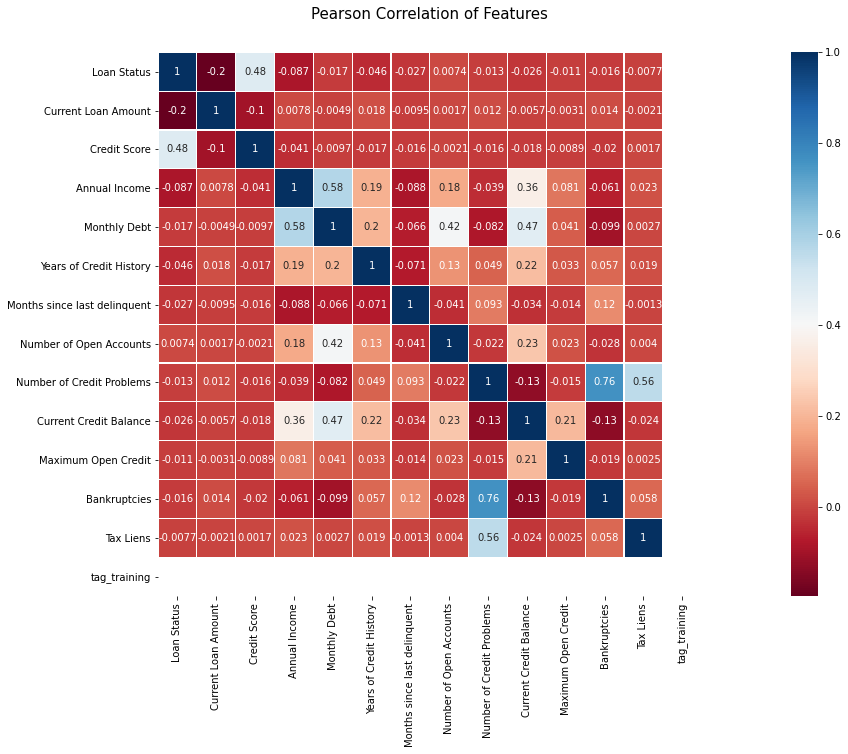

In [19]:
colormap = plt.cm.RdBu
plt.figure(figsize=(32,10))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(df.corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)
# Note that the categorical features have been neglected in the
# correlation matrix.

In [0]:
# Check Credit Score

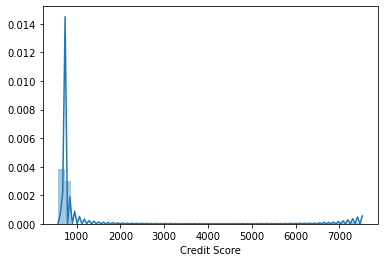

In [21]:
sns.distplot(df[df['Credit Score'].isna() == False]['Credit Score']) 

plt.show()

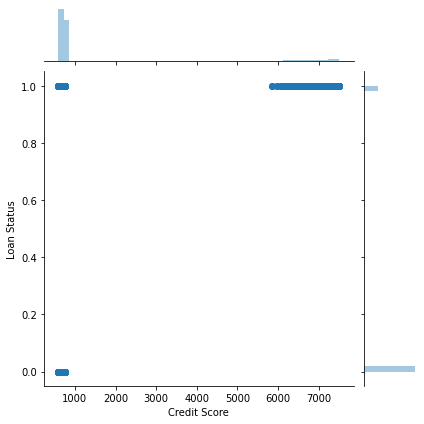

In [22]:


sns.jointplot(x="Credit Score", y="Loan Status", data=df[df['Credit Score'].isna() == False])

plt.show()



In [0]:
# Check Current Loan Amount

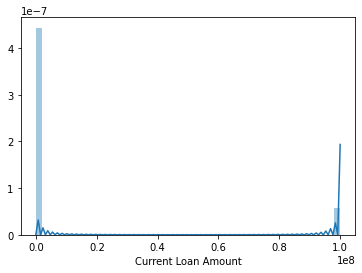

In [24]:
sns.distplot(df[df['Current Loan Amount'].isna() == False]['Current Loan Amount']) 

plt.show()

In [0]:
# Check Feature Statistic

In [0]:
df_cols = list()
for x in df.columns:
    if df[x].dtype != 'O':
        df_cols.append(x)

In [27]:
df[df_cols].describe()

,Loan Status,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,tag_training
count,22308.000000,2.230800e+04,17958.000000,1.795800e+04,22308.000000,22306.000000,10468.000000,22306.000000,22306.00000,2.230600e+04,2.230600e+04,22268.000000,22302.000000,22308.0
mean,0.231576,1.154716e+07,1107.312841,1.373749e+06,18427.322985,18.187367,35.392243,11.103739,0.17233,2.924350e+05,8.201877e+05,0.121340,0.029325,1.0
std,0.421849,3.152420e+07,1531.849129,9.048997e+05,12056.791261,6.935163,22.112291,4.999520,0.48198,3.488361e+05,8.087355e+06,0.354236,0.241331,0.0
min,0.000000,2.147200e+04,587.000000,1.112450e+05,0.000000,3.600000,0.000000,1.000000,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,1.0
25%,0.000000,1.786180e+05,705.000000,8.451770e+05,10072.470000,13.500000,16.000000,8.000000,0.00000,1.110740e+05,2.695440e+05,0.000000,0.000000,1.0
50%,0.000000,3.118610e+05,724.000000,1.167702e+06,16203.010000,16.900000,32.000000,10.000000,0.00000,2.089050e+05,4.635840e+05,0.000000,0.000000,1.0
75%,0.000000,5.254920e+05,741.000000,1.641614e+06,24076.990000,21.600000,52.000000,14.000000,0.00000,3.686950e+05,7.831340e+05,0.000000,0.000000,1.0
max,1.000000,1.000000e+08,7510.000000,3.083900e+07,120559.560000,53.200000,152.000000,48.000000,7.00000,7.423870e+06,6.324777e+08,5.000000,6.000000,1.0


In [0]:
# Replace Data with KNN

In [0]:
# from fancyimpute import KNN 
# # Use 5 nearest rows which have a feature to fill in each row's
# # missing features
# df_new = pd.DataFrame(KNN(k=5).fit_transform(df[df_cols]))
# df_new.columns = df_cols

In [0]:
df_temp = df.copy()

In [0]:
# Replace data with median from every group

In [0]:
# if your computer is too slow, you can replace the numeric data with mean with this code below :
for x in df_temp.columns:
    if df_temp[x].dtype == 'O':
        df_temp[x] = df_temp[x].fillna(df_temp[x].mode()[0])

In [0]:
df_temp['Credit Score'] = df_temp['Credit Score'].apply(lambda val: (val /10) if val>850 else val)

In [0]:
df_temp['Term'].replace(("Short Term","Long Term"),(0,1), inplace=True)

In [0]:
for x in ['Current Loan Amount','Annual Income','Monthly Debt','Credit Score']:
    if df_temp[x].dtype != 'O':
        df_temp[x] = df_temp[x].replace([np.nan, -np.inf, np.inf,99999999],[np.nan, np.nan, np.nan, np.nan])
        df_temp[x] = df_temp[x].fillna(df_temp.groupby(['Term','Years in current job','Purpose'])[x].transform('median'))

In [0]:
df_temp = df_temp.fillna(0)

In [37]:
df_temp.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,tag_training
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,0,445412.0,0,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,0.0,6.0,1.0,228190.0,416746.0,1.0,0.0,1
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,0,262328.0,0,730.0,1212903.0,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0,1
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,0,229086.0,0,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0,1
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,0,347666.0,1,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,0.0,9.0,0.0,256329.0,386958.0,0.0,0.0,1
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,0,176220.0,0,732.0,1138974.0,5 years,Rent,Debt Consolidation,20639.70,6.1,0.0,15.0,0.0,253460.0,427174.0,0.0,0.0,1


In [38]:
df_temp[df_temp.tag_training == 1].isna().sum()/len(df_temp[df_temp.tag_training==1])

Loan ID                         0.0
Customer ID                     0.0
Loan Status                     0.0
Current Loan Amount             0.0
Term                            0.0
Credit Score                    0.0
Annual Income                   0.0
Years in current job            0.0
Home Ownership                  0.0
Purpose                         0.0
Monthly Debt                    0.0
Years of Credit History         0.0
Months since last delinquent    0.0
Number of Open Accounts         0.0
Number of Credit Problems       0.0
Current Credit Balance          0.0
Maximum Open Credit             0.0
Bankruptcies                    0.0
Tax Liens                       0.0
tag_training                    0.0
dtype: float64

In [0]:
# Drop missing values :
df_temp = df_temp.dropna()

In [40]:
df_temp[df_temp['Loan Status']==0].describe()

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,tag_training
count,17142.0,17142.000000,17142.000000,17142.000000,1.714200e+04,17142.000000,17142.000000,17142.000000,17142.000000,17142.000000,1.714200e+04,1.714200e+04,17142.000000,17142.000000,17142.0
mean,0.0,301729.131140,0.256913,718.778847,1.367996e+06,18536.895405,18.361510,16.925913,11.083538,0.175825,2.974641e+05,8.690735e+05,0.124256,0.030335,1.0
std,0.0,178104.240987,0.436944,27.634185,8.031043e+05,12309.955228,7.002027,23.442427,5.015654,0.484764,3.699146e+05,9.089742e+06,0.354436,0.246819,0.0
min,0.0,0.000000,0.000000,0.000000,0.000000e+00,0.000000,3.600000,0.000000,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,1.0
25%,0.0,173932.000000,0.000000,706.500000,9.330188e+05,10073.800000,13.700000,0.000000,8.000000,0.000000,1.098295e+05,2.727010e+05,0.000000,0.000000,1.0
50%,0.0,255013.000000,0.000000,725.000000,1.199869e+06,16275.590000,17.000000,0.000000,10.000000,0.000000,2.086580e+05,4.734620e+05,0.000000,0.000000,1.0
75%,0.0,419760.000000,1.000000,737.000000,1.569106e+06,24201.772500,21.900000,31.000000,14.000000,0.000000,3.709608e+05,8.044685e+05,0.000000,0.000000,1.0
max,0.0,789096.000000,1.000000,751.000000,9.458200e+06,120559.560000,53.200000,120.000000,48.000000,7.000000,7.423870e+06,6.324777e+08,5.000000,6.000000,1.0


In [41]:
df_temp[df_temp['Loan Status']==1].describe()

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,tag_training
count,5166.0,5166.000000,5166.000000,5166.000000,5.166000e+03,5166.000000,5166.000000,5166.000000,5166.000000,5166.000000,5.166000e+03,5.166000e+03,5166.000000,5166.000000,5166.0
mean,1.0,323294.164925,0.370887,711.884050,1.214852e+06,18063.735989,17.602478,15.552071,11.166473,0.160666,2.756342e+05,6.576558e+05,0.110724,0.025939,1.0
std,0.0,185644.695828,0.483089,34.756038,8.631130e+05,11169.156491,6.684293,22.650924,4.949402,0.472403,2.665548e+05,2.866548e+06,0.352193,0.221988,0.0
min,1.0,21494.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,1.0
25%,1.0,179256.000000,0.000000,699.000000,8.493142e+05,10059.502500,13.100000,0.000000,8.000000,0.000000,1.158240e+05,2.574495e+05,0.000000,0.000000,1.0
50%,1.0,286110.000000,0.000000,721.000000,1.117181e+06,16064.310000,16.500000,0.000000,10.000000,0.000000,2.101020e+05,4.336200e+05,0.000000,0.000000,1.0
75%,1.0,440627.000000,1.000000,732.000000,1.360965e+06,23506.705000,20.600000,27.000000,14.000000,0.000000,3.606152e+05,7.169855e+05,0.000000,0.000000,1.0
max,1.0,788942.000000,1.000000,751.000000,3.083900e+07,98736.350000,50.900000,152.000000,45.000000,6.000000,5.176018e+06,1.124115e+08,5.000000,5.000000,1.0


In [42]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22308 entries, 0 to 11153
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Loan ID                       22308 non-null  object 
 1   Customer ID                   22308 non-null  object 
 2   Loan Status                   22308 non-null  int64  
 3   Current Loan Amount           22308 non-null  float64
 4   Term                          22308 non-null  int64  
 5   Credit Score                  22308 non-null  float64
 6   Annual Income                 22308 non-null  float64
 7   Years in current job          22308 non-null  object 
 8   Home Ownership                22308 non-null  object 
 9   Purpose                       22308 non-null  object 
 10  Monthly Debt                  22308 non-null  float64
 11  Years of Credit History       22308 non-null  float64
 12  Months since last delinquent  22308 non-null  float64
 13  N

In [0]:
# feature enginering :
df_temp['dsr'] = (df_temp['Monthly Debt']*12)/(df_temp['Annual Income']+1)
df_temp['tag credit Score'] = df_temp['Credit Score'].apply(lambda val: 1 if np.isreal(val) and val < 580 else val)
df_temp['tag credit Score'] = df_temp['Credit Score'].apply(lambda val: 2 if np.isreal(val) and (val >= 580 and val < 670) else val)
df_temp['tag credit Score'] = df_temp['Credit Score'].apply(lambda val: 3 if np.isreal(val) and (val >= 670 and val < 740) else val)
df_temp['tag credit Score'] = df_temp['Credit Score'].apply(lambda val: 4 if np.isreal(val) and (val >= 740 and val < 800) else val)
df_temp['tag credit Score'] = df_temp['Credit Score'].apply(lambda val: 5 if np.isreal(val) and (val >= 800 and val <= 850) else val)


df_temp['tag credit Problems'] = df_temp['Number of Credit Problems'].apply(lambda x: 3 if x==0 else (2 if x>0 and x<5 else 1))
df_temp['tag credit Age'] = df_temp['Years of Credit History'].apply(lambda x: 1 if x<5 else (2 if x>5 and x<17 else 3))
df_temp['tag tax Liens'] = df_temp['Tax Liens'].apply(lambda x: 3 if x==0 else (2 if x>0 and x<3 else 1))
df_temp['tag bankruptcies'] = df_temp['Bankruptcies'].apply(lambda x: 3 if x==0 else (2 if x>0 and x<3 else 1))

df_temp = df_temp.drop(columns = ['Number of Credit Problems','Years of Credit History','Tax Liens',])

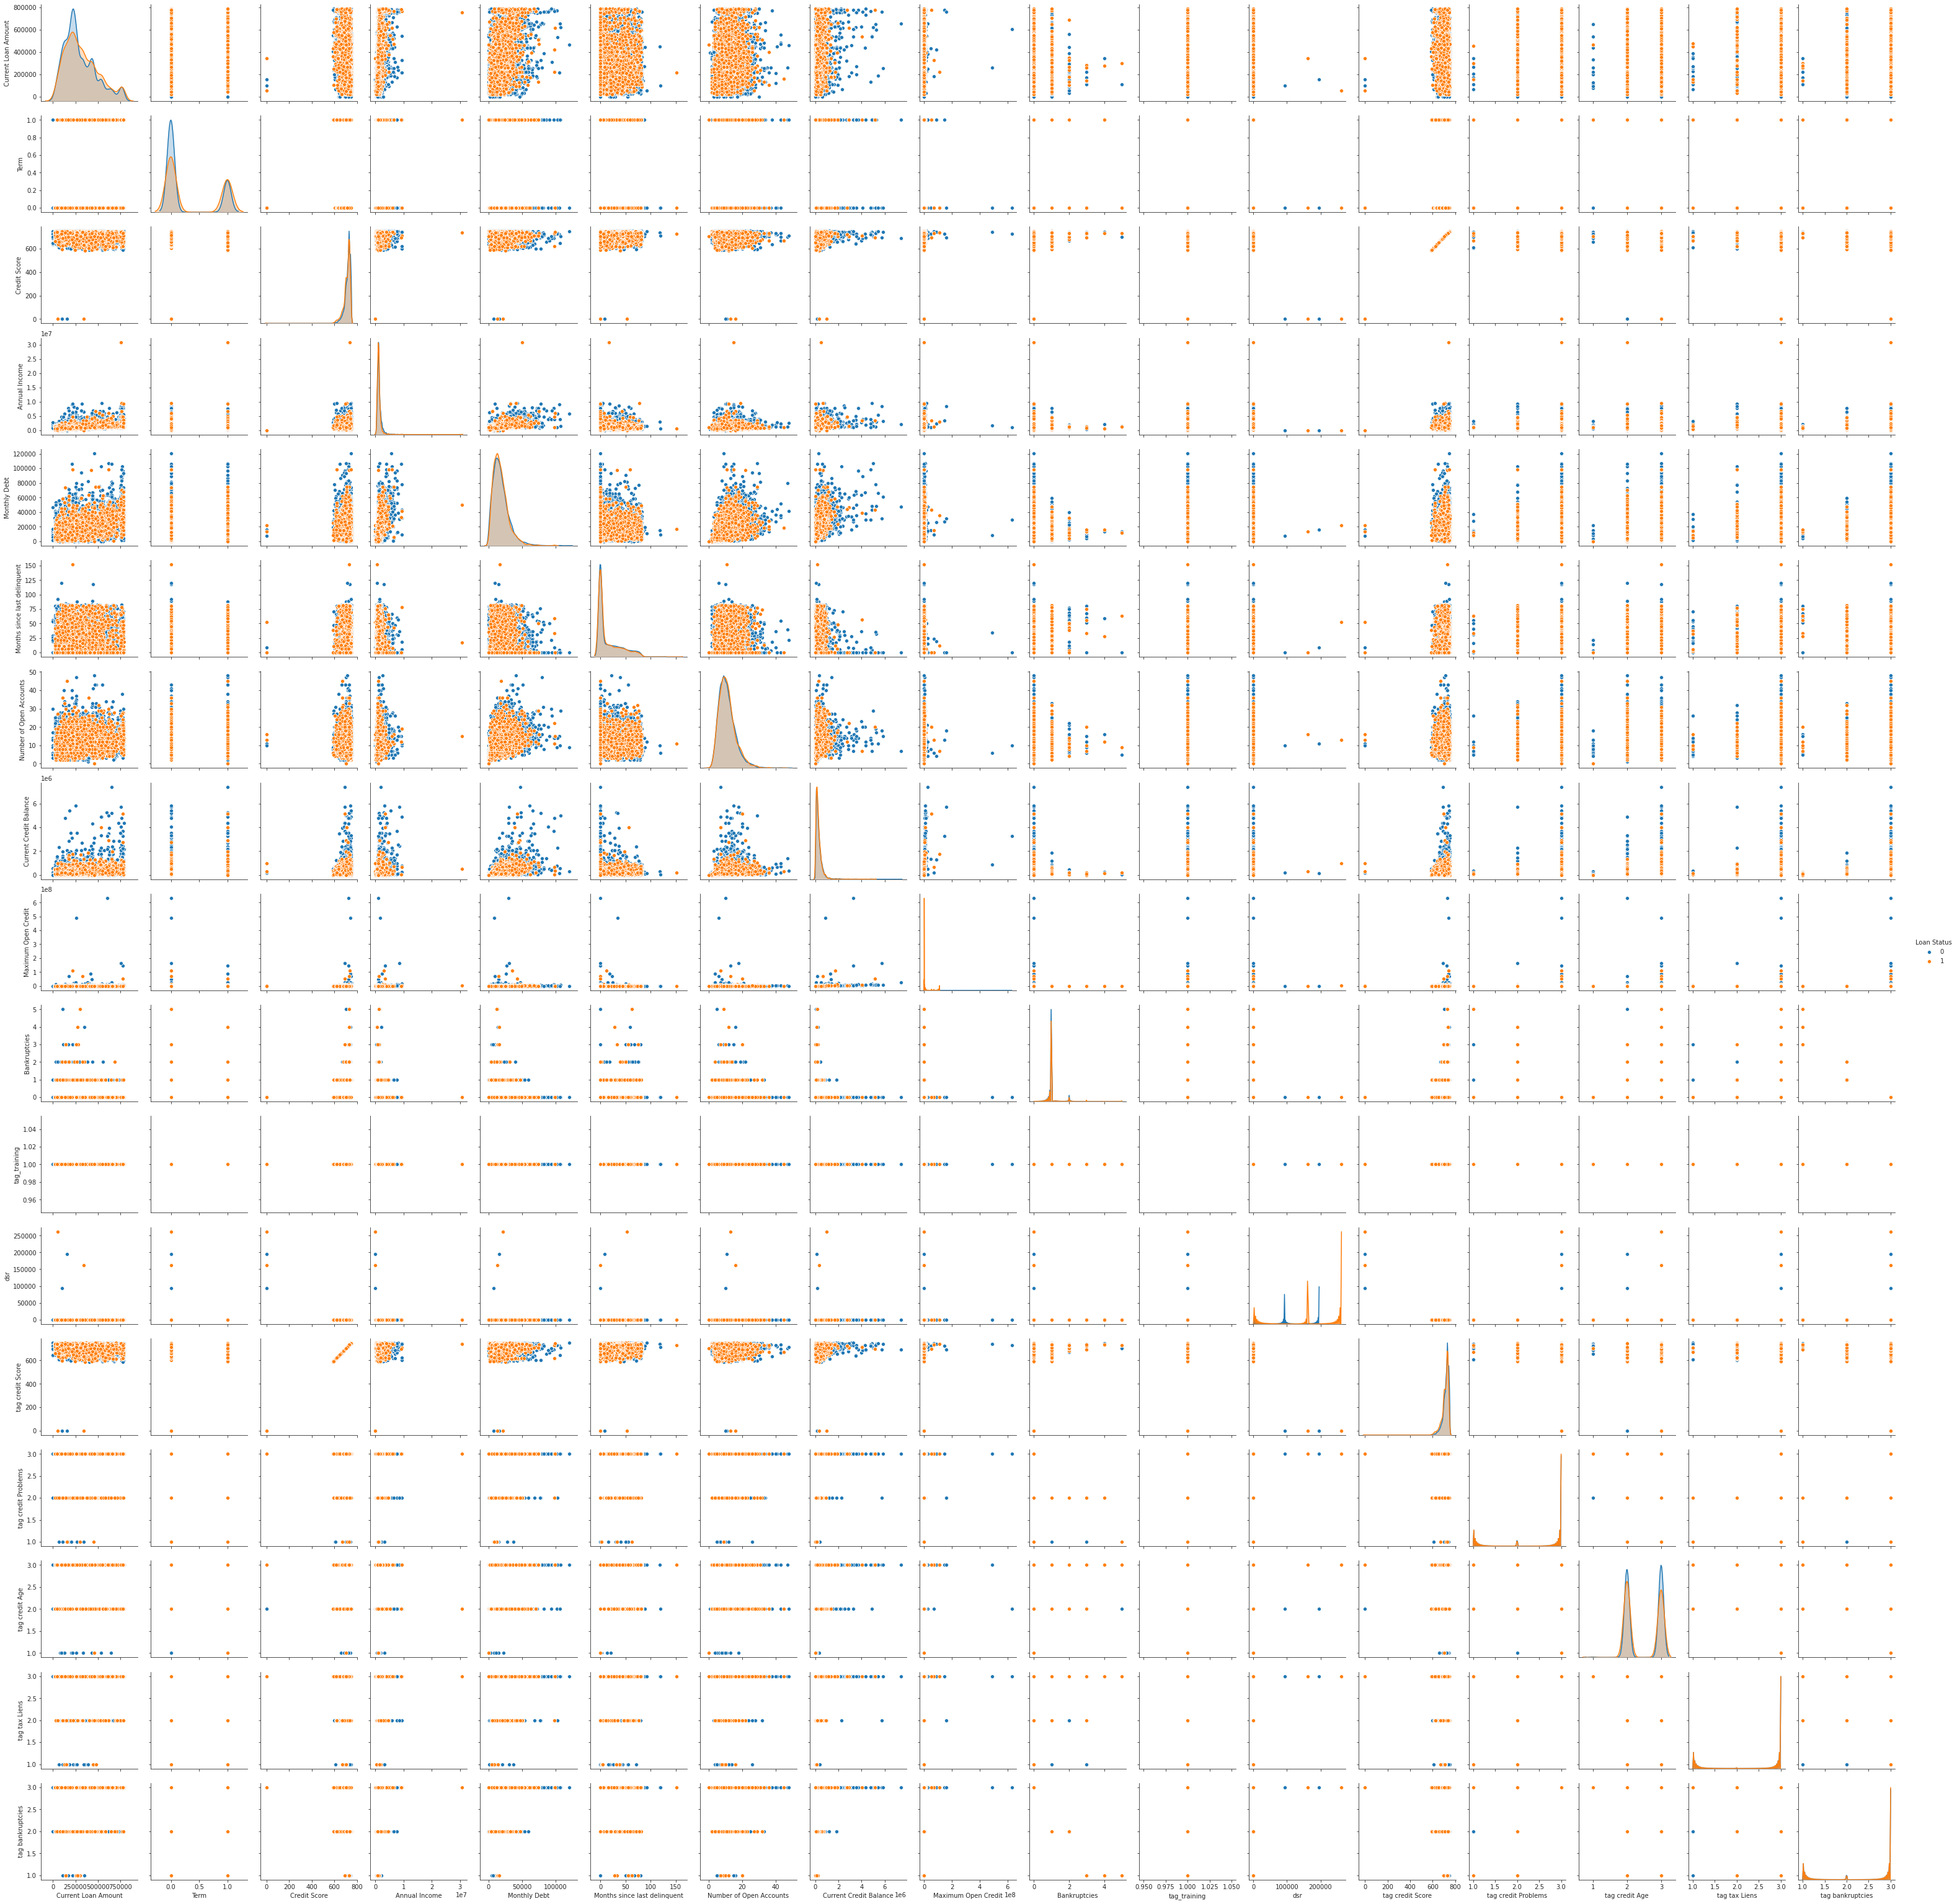

In [44]:
#Check parplot between 2 features
sns.set_style("ticks")
sns.pairplot(df_temp, hue='Loan Status')
plt.show()


In [45]:
df_temp.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Months since last delinquent,Number of Open Accounts,Current Credit Balance,Maximum Open Credit,Bankruptcies,tag_training,dsr,tag credit Score,tag credit Problems,tag credit Age,tag tax Liens,tag bankruptcies
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,0,445412.0,0,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,0.0,6.0,228190.0,416746.0,1.0,1,0.053599,709.0,2,3,3,2
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,0,262328.0,0,730.0,1212903.0,10+ years,Home Mortgage,Debt Consolidation,33295.98,8.0,35.0,229976.0,850784.0,0.0,1,0.329417,730.0,3,3,3,3
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,0,229086.0,0,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,29.0,18.0,297996.0,750090.0,0.0,1,0.157000,741.0,2,2,3,3
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,0,347666.0,1,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,0.0,9.0,256329.0,386958.0,0.0,1,0.129999,721.0,3,2,3,3
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,0,176220.0,0,732.0,1138974.0,5 years,Rent,Debt Consolidation,20639.70,0.0,15.0,253460.0,427174.0,0.0,1,0.217456,732.0,3,2,3,3


In [0]:
# Dummy
df_temp2 = pd.get_dummies(df_temp.drop(columns = ['Customer ID','Loan ID']))

In [0]:
pd.options.display.max_rows=None
pd.options.display.max_columns=None

In [48]:
df_temp2.head()

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Monthly Debt,Months since last delinquent,Number of Open Accounts,Current Credit Balance,Maximum Open Credit,Bankruptcies,tag_training,dsr,tag credit Score,tag credit Problems,tag credit Age,tag tax Liens,tag bankruptcies,Years in current job_1 year,Years in current job_10+ years,Years in current job_2 years,Years in current job_3 years,Years in current job_4 years,Years in current job_5 years,Years in current job_6 years,Years in current job_7 years,Years in current job_8 years,Years in current job_9 years,Years in current job_< 1 year,Home Ownership_HaveMortgage,Home Ownership_Home Mortgage,Home Ownership_Own Home,Home Ownership_Rent,Purpose_Business Loan,Purpose_Buy House,Purpose_Buy a Car,Purpose_Debt Consolidation,Purpose_Educational Expenses,Purpose_Home Improvements,Purpose_Medical Bills,Purpose_Other,Purpose_Take a Trip,Purpose_major_purchase,Purpose_moving,Purpose_other,Purpose_small_business,Purpose_vacation,Purpose_wedding
0,0,445412.0,0,709.0,1167493.0,5214.74,0.0,6.0,228190.0,416746.0,1.0,1,0.053599,709.0,2,3,3,2,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,0,262328.0,0,730.0,1212903.0,33295.98,8.0,35.0,229976.0,850784.0,0.0,1,0.329417,730.0,3,3,3,3,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,229086.0,0,741.0,2231892.0,29200.53,29.0,18.0,297996.0,750090.0,0.0,1,0.157000,741.0,2,2,3,3,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,347666.0,1,721.0,806949.0,8741.90,0.0,9.0,256329.0,386958.0,0.0,1,0.129999,721.0,3,2,3,3,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,0,176220.0,0,732.0,1138974.0,20639.70,0.0,15.0,253460.0,427174.0,0.0,1,0.217456,732.0,3,2,3,3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [0]:
data_train = df_temp2[df_temp2.tag_training == 1]
data_test = df_temp2[df_temp2.tag_training == 0]

X = data_train.drop(columns=['Loan Status','tag_training'])
y = data_train['Loan Status']


In [0]:
sc_x = StandardScaler()
X_sc = pd.DataFrame(sc_x.fit_transform(X), columns = X.columns)

In [51]:
X_train, X_test, y_train, y_test = data_prep(X,y,0.25)

========== panjang X train ==========
16731
========== panjang X test ===========
5577


In [0]:
# Smote Tomek

In [0]:
from imblearn.combine import SMOTETomek
stomek = SMOTETomek (random_state=10)
x_stomek, y_stomek = stomek.fit_sample(X_train, y_train)
x_stomek = pd.DataFrame(x_stomek,columns = X_train.columns)

In [0]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=10)
x_smote, y_smote = sm.fit_sample(X_train, y_train)
x_smote = pd.DataFrame(x_smote,columns = X_train.columns)

In [0]:
from imblearn.under_sampling import TomekLinks
tomekl = TomekLinks(random_state=0,n_jobs=24)
x_tomekl, y_tomekl = tomekl.fit_sample(X_train, y_train)
x_tomekl = pd.DataFrame(x_tomekl,columns = X_train.columns)

In [0]:
# Modeling

In [0]:
from tensorflow.python.keras.layers import Dense, Dropout
from tensorflow.python.keras import Sequential

In [58]:
classifier = Sequential()
#First Hidden Layer
classifier.add(Dense(10, activation='relu', kernel_initializer='random_normal', input_dim=len(X.columns)))
classifier.add(Dropout(0.3))
#Second  Hidden Layer
classifier.add(Dense(10, activation='relu', kernel_initializer='random_normal'))
classifier.add(Dropout(0.3))
#Second  Hidden Layer
classifier.add(Dense(15, activation='relu', kernel_initializer='random_normal'))
classifier.add(Dropout(0.3))
#Second  Hidden Layer
classifier.add(Dense(15, activation='relu', kernel_initializer='random_normal'))
classifier.add(Dropout(0.3))
#Second  Hidden Layer
classifier.add(Dense(15, activation='relu', kernel_initializer='random_normal'))
classifier.add(Dropout(0.3))
#Second  Hidden Layer
classifier.add(Dense(15, activation='relu', kernel_initializer='random_normal'))
classifier.add(Dropout(0.3))
#Second  Hidden Layer
classifier.add(Dense(15, activation='relu', kernel_initializer='random_normal'))
classifier.add(Dropout(0.3))
#Second  Hidden Layer
classifier.add(Dense(10, activation='relu', kernel_initializer='random_normal'))
classifier.add(Dropout(0.3))
#Second  Hidden Layer
classifier.add(Dense(10, activation='relu', kernel_initializer='random_normal'))
classifier.add(Dropout(0.3))
#Output Layer
classifier.add(Dense(1, activation='sigmoid', kernel_initializer='random_normal'))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [59]:
#Compiling the neural network
classifier.compile(optimizer ='adam',loss='binary_crossentropy', metrics =['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [60]:
#Fitting the data to the training dataset
classifier.fit(x_tomekl, y_tomekl,validation_split=0.4, batch_size=10, epochs=2, verbose=1)

Train on 9949 samples, validate on 6633 samples
Epoch 1/2
9949/9949 [==============================] - 3s 348us/sample - loss: 0.5796 - acc: 0.7665 - val_loss: 0.5560 - val_acc: 0.7659
Epoch 2/2
9949/9949 [==============================] - 3s 290us/sample - loss: 0.5456 - acc: 0.7666 - val_loss: 0.5436 - val_acc: 0.7659


In [61]:
eval_model=classifier.evaluate(x_tomekl, y_tomekl)
eval_model

16582/16582 [==============================] - 0s 30us/sample - loss: 0.5433 - acc: 0.7663


[0.5432707796143099, 0.7663129]

In [0]:
def grafik_cm(labels_test,pred):
    cnf_matrix=confusion_matrix(labels_test,pred)
    print("Accuracy : {}", accuracy_score(labels_test,pred))
    print("the recall for this model is :",cnf_matrix[1,1]/(cnf_matrix[1,1]+cnf_matrix[1,0]))
    print("ROC", roc_auc_score(labels_test, pred))
    fig= plt.figure(figsize=(6,3))
    print("TP",cnf_matrix[1,1,])
    print("TN",cnf_matrix[0,0]) 
    print("FP",cnf_matrix[0,1]) 
    print("FN",cnf_matrix[1,0]) 
    
    sns.heatmap(cnf_matrix,cmap="coolwarm_r",annot=True,linewidths=0.5)
    plt.title("Confusion_matrix")
    plt.xlabel("Predicted_class")
    plt.ylabel("Real class")
    plt.show()
    print("\n----------Classification Report------------------------------------")
    print(classification_report(labels_test,pred))

====================================0.2=====================
Accuracy : {} 0.23292092522861754
the recall for this model is : 0.9969016266460109
ROC 0.4998507199958939
TP 1287
TN 12
FP 4274
FN 4


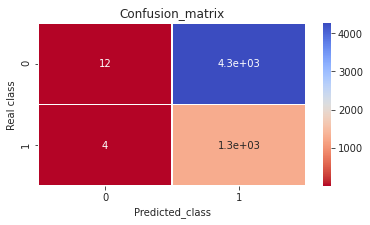


----------Classification Report------------------------------------
              precision    recall  f1-score   support

           0       0.75      0.00      0.01      4286
           1       0.23      1.00      0.38      1291

    accuracy                           0.23      5577
   macro avg       0.49      0.50      0.19      5577
weighted avg       0.63      0.23      0.09      5577

====================================0.21000000000000002=====================
Accuracy : {} 0.23381746458669536
the recall for this model is : 0.9969016266460109
ROC 0.5004340144429308
TP 1287
TN 17
FP 4269
FN 4


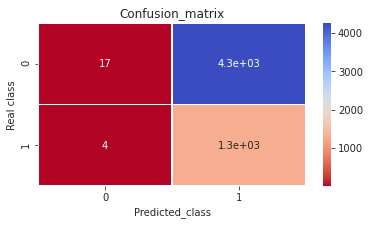


----------Classification Report------------------------------------
              precision    recall  f1-score   support

           0       0.81      0.00      0.01      4286
           1       0.23      1.00      0.38      1291

    accuracy                           0.23      5577
   macro avg       0.52      0.50      0.19      5577
weighted avg       0.68      0.23      0.09      5577

====================================0.22000000000000003=====================
Accuracy : {} 0.23632777478931324
the recall for this model is : 0.9969016266460109
ROC 0.502067238894634
TP 1287
TN 31
FP 4255
FN 4


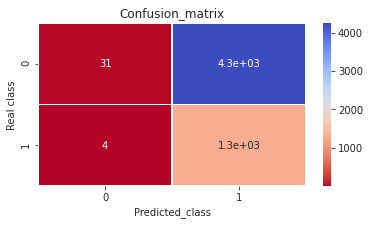


----------Classification Report------------------------------------
              precision    recall  f1-score   support

           0       0.89      0.01      0.01      4286
           1       0.23      1.00      0.38      1291

    accuracy                           0.24      5577
   macro avg       0.56      0.50      0.20      5577
weighted avg       0.73      0.24      0.10      5577

====================================0.23000000000000004=====================
Accuracy : {} 0.2411690873229335
the recall for this model is : 0.9938032532920217
ROC 0.5041344777892679
TP 1283
TN 62
FP 4224
FN 8


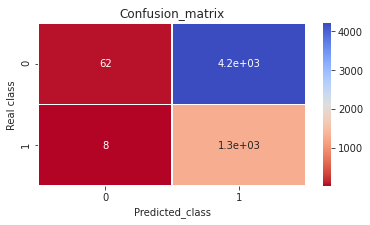


----------Classification Report------------------------------------
              precision    recall  f1-score   support

           0       0.89      0.01      0.03      4286
           1       0.23      0.99      0.38      1291

    accuracy                           0.24      5577
   macro avg       0.56      0.50      0.20      5577
weighted avg       0.73      0.24      0.11      5577

====================================0.24000000000000005=====================
Accuracy : {} 0.2625067240451856
the recall for this model is : 0.9829589465530596
ROC 0.5142279567109675
TP 1269
TN 195
FP 4091
FN 22


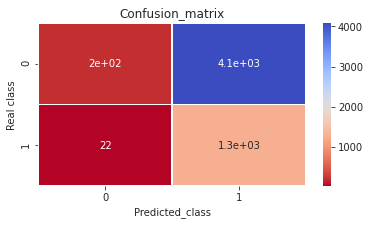


----------Classification Report------------------------------------
              precision    recall  f1-score   support

           0       0.90      0.05      0.09      4286
           1       0.24      0.98      0.38      1291

    accuracy                           0.26      5577
   macro avg       0.57      0.51      0.23      5577
weighted avg       0.75      0.26      0.15      5577

====================================0.25000000000000006=====================
Accuracy : {} 0.3950152411690873
the recall for this model is : 0.838884585592564
ROC 0.5501002489325395
TP 1083
TN 1120
FP 3166
FN 208


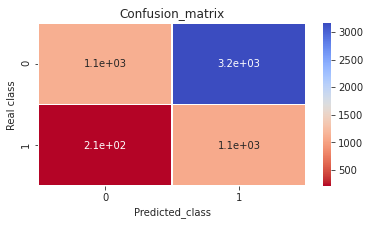


----------Classification Report------------------------------------
              precision    recall  f1-score   support

           0       0.84      0.26      0.40      4286
           1       0.25      0.84      0.39      1291

    accuracy                           0.40      5577
   macro avg       0.55      0.55      0.39      5577
weighted avg       0.71      0.40      0.40      5577

====================================0.26000000000000006=====================
Accuracy : {} 0.768513537744307
the recall for this model is : 0.0
ROC 0.5
TP 0
TN 4286
FP 0
FN 1291


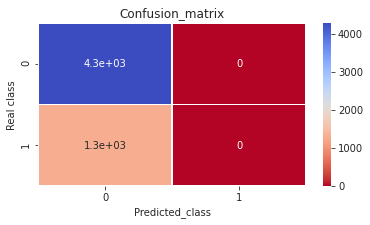


----------Classification Report------------------------------------
              precision    recall  f1-score   support

           0       0.77      1.00      0.87      4286
           1       0.00      0.00      0.00      1291

    accuracy                           0.77      5577
   macro avg       0.38      0.50      0.43      5577
weighted avg       0.59      0.77      0.67      5577

====================================0.2700000000000001=====================
Accuracy : {} 0.768513537744307
the recall for this model is : 0.0
ROC 0.5
TP 0
TN 4286
FP 0
FN 1291


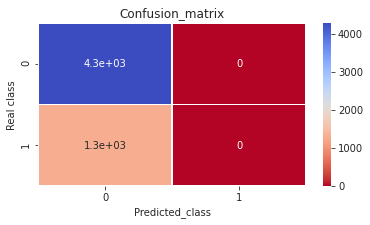


----------Classification Report------------------------------------
              precision    recall  f1-score   support

           0       0.77      1.00      0.87      4286
           1       0.00      0.00      0.00      1291

    accuracy                           0.77      5577
   macro avg       0.38      0.50      0.43      5577
weighted avg       0.59      0.77      0.67      5577

====================================0.2800000000000001=====================
Accuracy : {} 0.768513537744307
the recall for this model is : 0.0
ROC 0.5
TP 0
TN 4286
FP 0
FN 1291


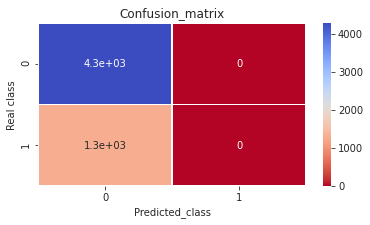


----------Classification Report------------------------------------
              precision    recall  f1-score   support

           0       0.77      1.00      0.87      4286
           1       0.00      0.00      0.00      1291

    accuracy                           0.77      5577
   macro avg       0.38      0.50      0.43      5577
weighted avg       0.59      0.77      0.67      5577

====================================0.2900000000000001=====================
Accuracy : {} 0.768513537744307
the recall for this model is : 0.0
ROC 0.5
TP 0
TN 4286
FP 0
FN 1291


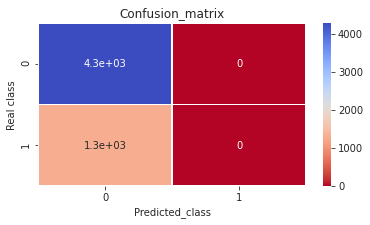


----------Classification Report------------------------------------
              precision    recall  f1-score   support

           0       0.77      1.00      0.87      4286
           1       0.00      0.00      0.00      1291

    accuracy                           0.77      5577
   macro avg       0.38      0.50      0.43      5577
weighted avg       0.59      0.77      0.67      5577

====================================0.3000000000000001=====================
Accuracy : {} 0.768513537744307
the recall for this model is : 0.0
ROC 0.5
TP 0
TN 4286
FP 0
FN 1291


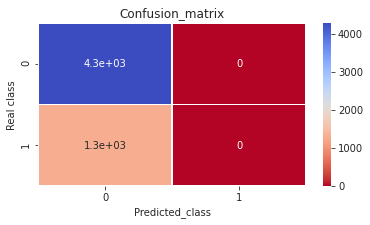


----------Classification Report------------------------------------
              precision    recall  f1-score   support

           0       0.77      1.00      0.87      4286
           1       0.00      0.00      0.00      1291

    accuracy                           0.77      5577
   macro avg       0.38      0.50      0.43      5577
weighted avg       0.59      0.77      0.67      5577



In [63]:
for z in np.arange(0.2,0.31,0.01):
    print("===================================="+str(z)+"=====================")
    y_pred=classifier.predict(X_test)
    y_pred = [int(1) if x>=z else int(0) for x in y_pred ] 
    grafik_cm(y_test,y_pred)

Accuracy : {} 0.2625067240451856
the recall for this model is : 0.9829589465530596
ROC 0.5142279567109675
TP 1269
TN 195
FP 4091
FN 22


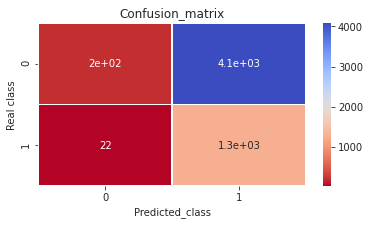


----------Classification Report------------------------------------
              precision    recall  f1-score   support

           0       0.90      0.05      0.09      4286
           1       0.24      0.98      0.38      1291

    accuracy                           0.26      5577
   macro avg       0.57      0.51      0.23      5577
weighted avg       0.75      0.26      0.15      5577



In [64]:
y_pred=classifier.predict(X_test)
y_pred = [int(1) if x> 0.24 else int(0) for x in y_pred ] 
grafik_cm(y_test,y_pred)